We explore here the distribution of A, T, G or C mutated among the mutated molecules sequenced in a DGRec experiment.

We start from a list of genotypes and the number molecules found for each:

In [ ]:
#|code-fold: true
from dgrec.utils import parse_genotypes, str_to_mut
from dgrec.example_data import get_example_data_dir
from Bio import SeqIO
import os
import numpy as np
import matplotlib.pyplot as plt

#Importing a list of genotypes with the number of molecules detected for each genotype
data_path=get_example_data_dir()
gen_list=parse_genotypes(os.path.join(data_path,"sacB_genotypes.csv"))

gen_list[0:50:5]

[('', 42572),
 ('A76G', 112),
 ('T67G', 67),
 ('T90G', 41),
 ('A76G,A91G', 29),
 ('A72G,A79T', 22),
 ('A72G,A79G', 20),
 ('A111G', 17),
 ('A79T,A91T', 15),
 ('A79C,A91G', 13)]

We then plot how many of each base is found mutated among mutated molecules

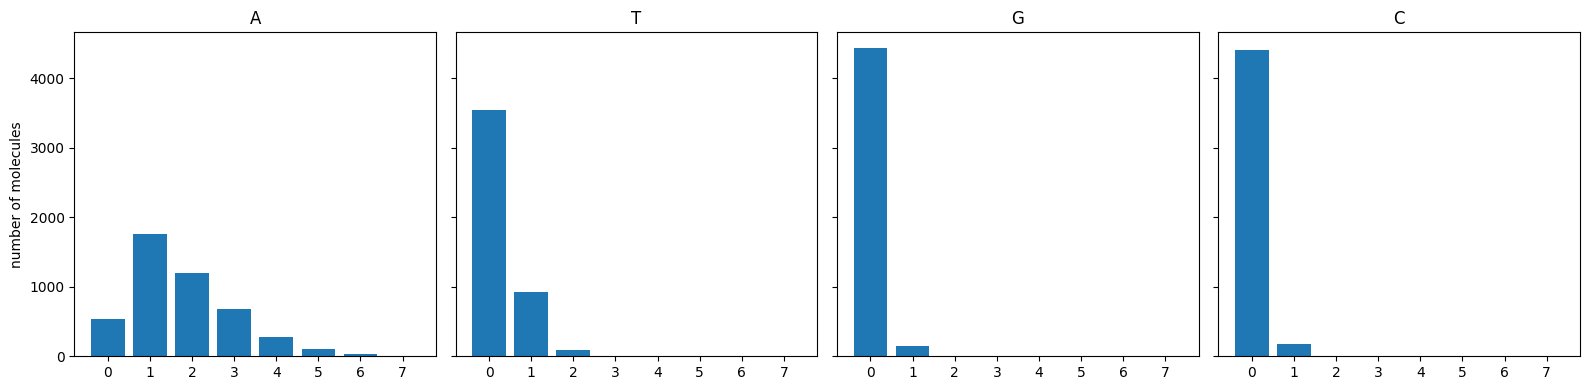

In [ ]:
#|code-fold: true
#converting genotype strings to lists
mutations=[[str_to_mut(gen[0]),gen[1]] for gen in gen_list[1:]] 

#Counting the number genotypes with c bases mutated for each possible base
bases="ATGC"
nN_mut=dict([(b,np.zeros(8)) for b in bases])
for g,n in mutations:
    mutated_bases=np.array(list(zip(*g))[0])
    for b in bases:
        c=np.sum(mutated_bases==b) #number of mutated bases that are adenines
        nN_mut[b][c]+=n

fig, axes = plt.subplots(1,4,figsize=(16,4), sharey=True)
axes[0].set_ylabel("number of molecules")
for i,b in enumerate(bases):
    axes[i].bar(range(8),nN_mut[b])
    axes[i].set_title(b)
    axes[i].set_xticks(range(8))
    

# Adjust layout
plt.tight_layout()
plt.show()